In [95]:
#k nearest neighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
df = pd.read_csv("gene_expression.csv")

In [11]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

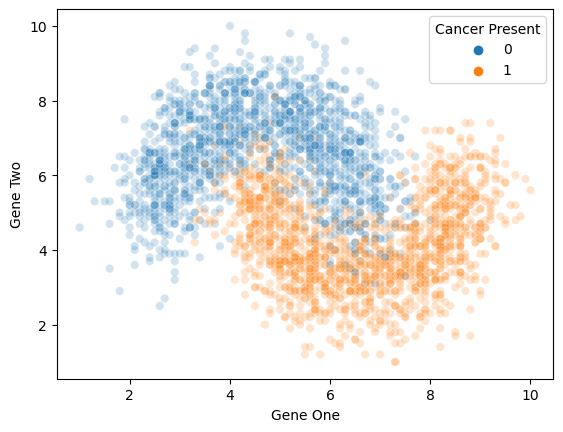

In [13]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.2)

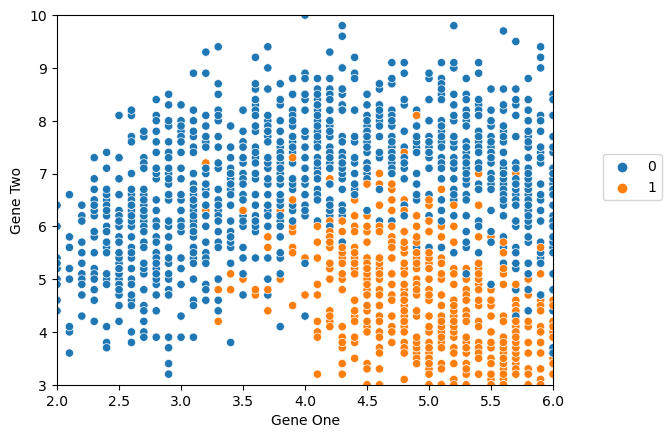

In [16]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

In [20]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
scaler = StandardScaler()

In [49]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [51]:
full_test = pd.concat([X_test,y_test],axis=1)

In [53]:
len(full_test)

900

<Axes: xlabel='Gene One', ylabel='Gene Two'>

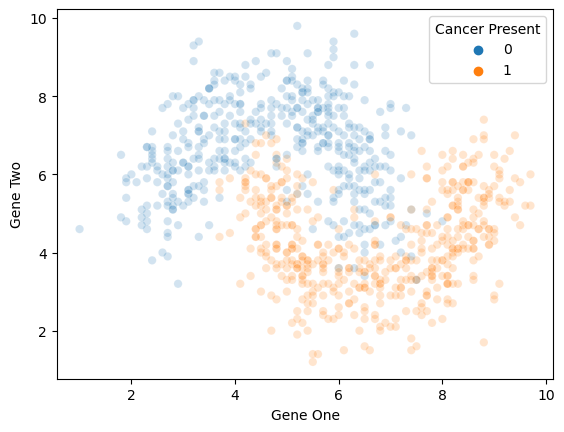

In [56]:
#scatter of just the test data
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',
                data=full_test,alpha=0.2)

In [69]:
testerror_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    testerror = 1 - accuracy_score(y_test,y_pred_test)
    testerror_rates.append(testerror)

Text(0.5, 0, 'K Value')

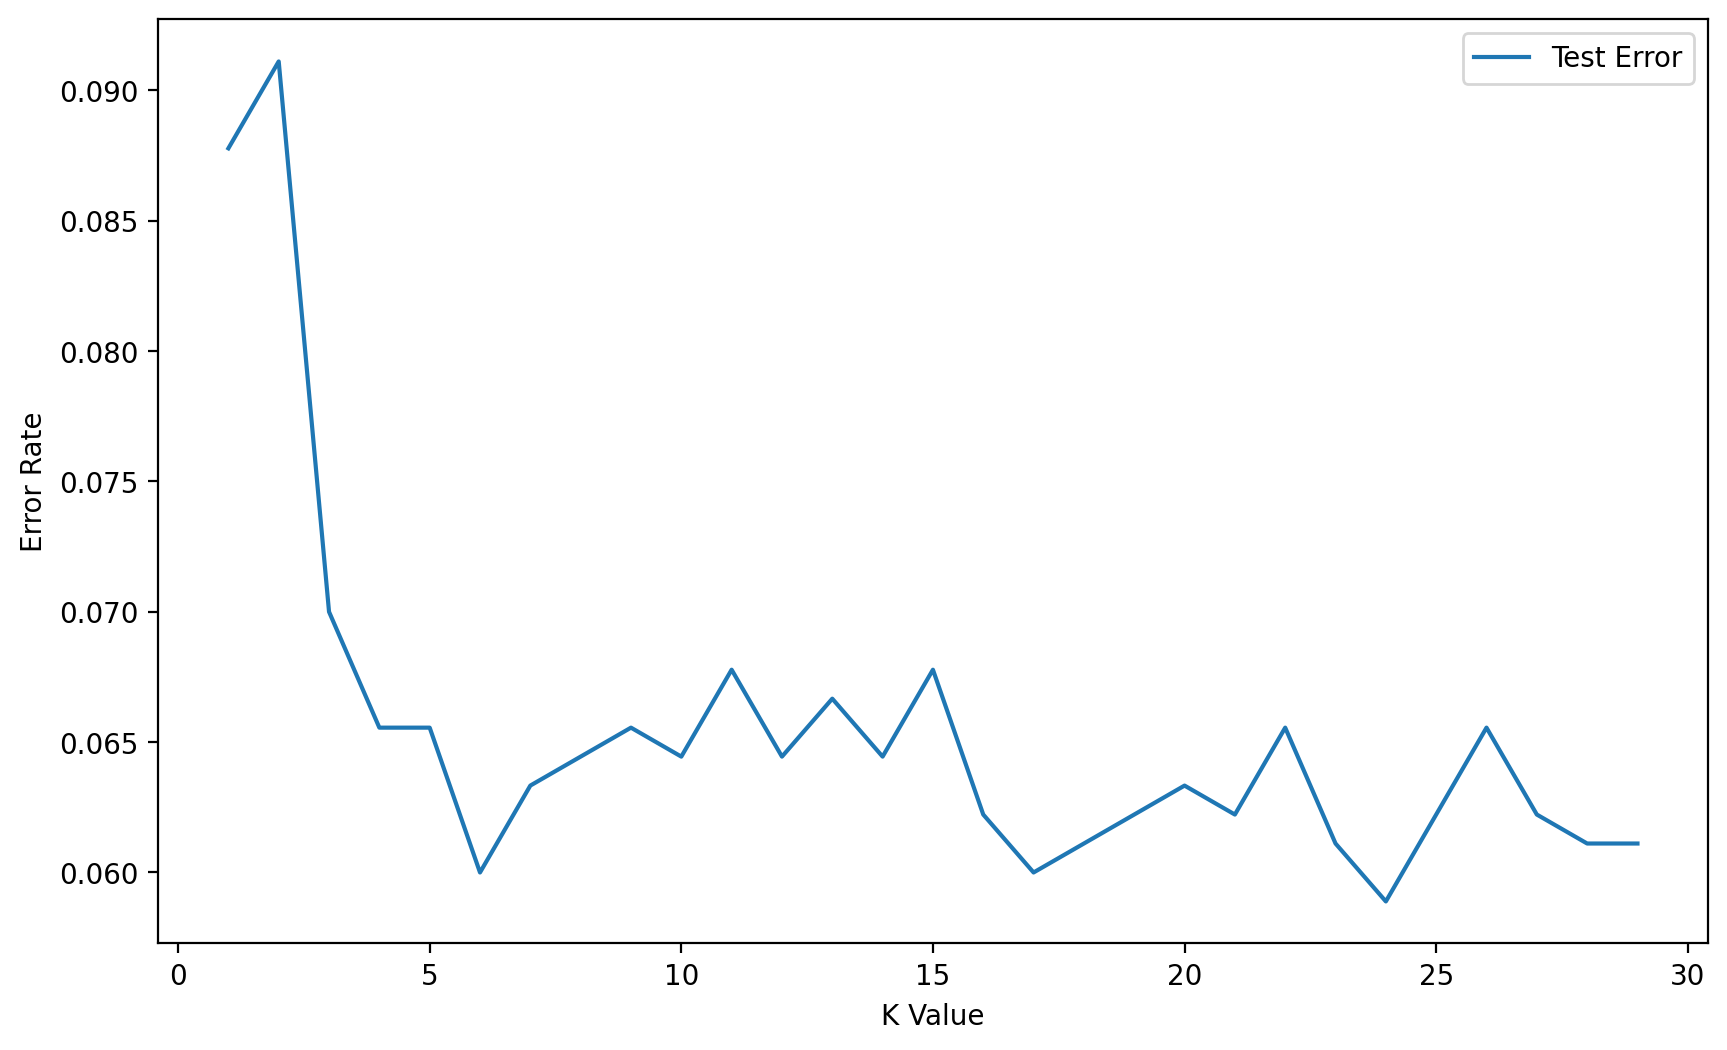

In [71]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),testerror_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [76]:
y_pred = knn_model.predict(scaled_X_test)

In [79]:
scaler = StandardScaler() #removes mean scales to variance

In [81]:
knn = KNeighborsClassifier()

In [84]:
knn.get_params().keys() #retrieves the hyperparameters

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [87]:
operations = [('scaler',scaler),('knn',knn)]

In [99]:
pipe = Pipeline(operations)

In [125]:
k_vals = list(range(1,26))
k_vals;

In [127]:
param_grid = {'knn__n_neighbors': k_vals}

In [148]:
fullcv_classifier = GridSearchCV(pipe,param_grid,cv=25,scoring='accuracy')

In [150]:
fullcv_classifier.fit(X_train,y_train)

GridSearchCV(cv=25,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25]},
             scoring='accuracy')

In [151]:
fullcv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=18))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [157]:
fullcv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'split10_test_score', 'split11_test_score', 'split12_test_score', 'split13_test_score', 'split14_test_score', 'split15_test_score', 'split16_test_score', 'split17_test_score', 'split18_test_score', 'split19_test_score', 'split20_test_score', 'split21_test_score', 'split22_test_score', 'split23_test_score', 'split24_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [165]:
scaler = StandardScaler()
knn18 = KNeighborsClassifier(n_neighbors=18)
operations = [('scaler',scaler),('knn18',knn18)]

In [168]:
pipe = Pipeline(operations)

In [171]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn18', KNeighborsClassifier(n_neighbors=18))])

In [210]:
pipe_pred = pipe.predict(X_test)

In [212]:
# convert predictions for plotting
pipepred_series = pd.Series(pipe_pred, index=X_test.index)

In [177]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [194]:
data_pred = model_reg.predict(scaled_x_test.values)

In [222]:
X_trainvals = X_train.values # conversion of X into array

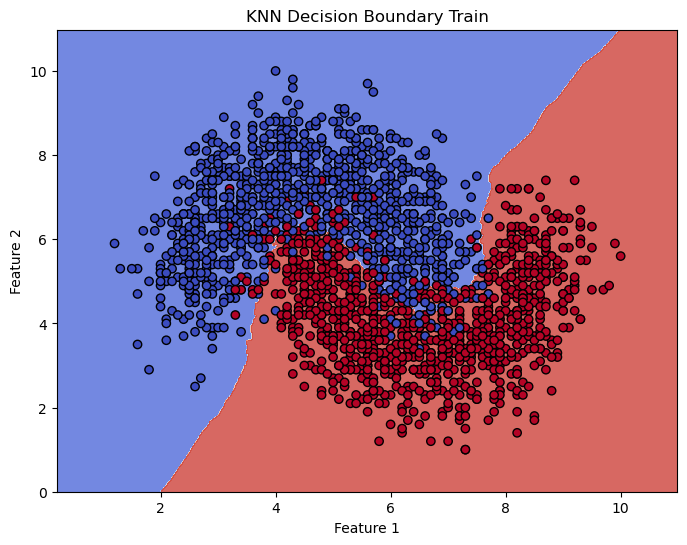

In [238]:
# Define the mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_trainvals[:, 0].min() - 1, X_trainvals[:, 0].max() + 1
y_min, y_max = X_trainvals[:, 1].min() - 1, X_trainvals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict on the mesh grid
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_trainvals[:, 0], X_trainvals[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary Train')
plt.show()

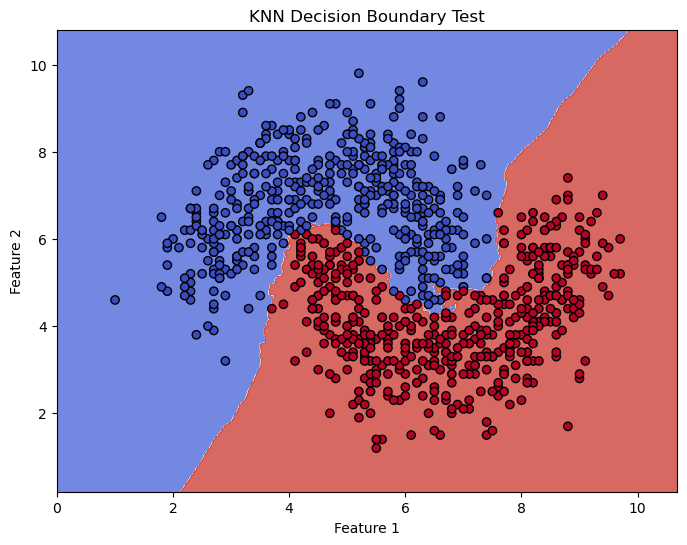

In [236]:
h = .02  # step size in the mesh
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict on the mesh grid
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=pipepred_series, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary Test')
plt.show()